In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [4]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [5]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

No Null values, Dataset is clean

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Device Model' column
df['Device Model'] = le.fit_transform(df['Device Model'])

In [8]:
df = pd.get_dummies(df, columns=['Device Model'], drop_first=True)

In [9]:
df.head()

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_1,Device Model_2,Device Model_3,Device Model_4
0,1,Android,393,6.4,1872,67,1122,40,Male,4,False,False,False,False
1,2,Android,268,4.7,1331,42,944,47,Female,3,True,False,False,False
2,3,Android,154,4.0,761,32,322,42,Male,2,False,False,True,False
3,4,Android,239,4.8,1676,56,871,20,Male,3,False,False,False,False
4,5,iOS,187,4.3,1367,58,988,31,Female,3,False,False,False,True


In [10]:
# Create a LabelEncoder object
le1 = LabelEncoder()

# Fit and transform the 'Device Model' column
df['Operating System'] = le1.fit_transform(df['Operating System'])
df = pd.get_dummies(df, columns=['Operating System'], drop_first=True)
df.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_1,Device Model_2,Device Model_3,Device Model_4,Operating System_1
0,1,393,6.4,1872,67,1122,40,Male,4,False,False,False,False,False
1,2,268,4.7,1331,42,944,47,Female,3,True,False,False,False,False
2,3,154,4.0,761,32,322,42,Male,2,False,False,True,False,False
3,4,239,4.8,1676,56,871,20,Male,3,False,False,False,False,False
4,5,187,4.3,1367,58,988,31,Female,3,False,False,False,True,True


In [11]:
# Create a LabelEncoder object
le2 = LabelEncoder()

# Fit and transform the 'Device Model' column
df['Gender'] = le2.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_1,Device Model_2,Device Model_3,Device Model_4,Operating System_1,Gender_1
0,1,393,6.4,1872,67,1122,40,4,False,False,False,False,False,True
1,2,268,4.7,1331,42,944,47,3,True,False,False,False,False,False
2,3,154,4.0,761,32,322,42,2,False,False,True,False,False,True
3,4,239,4.8,1676,56,871,20,3,False,False,False,False,False,True
4,5,187,4.3,1367,58,988,31,3,False,False,False,True,True,False


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

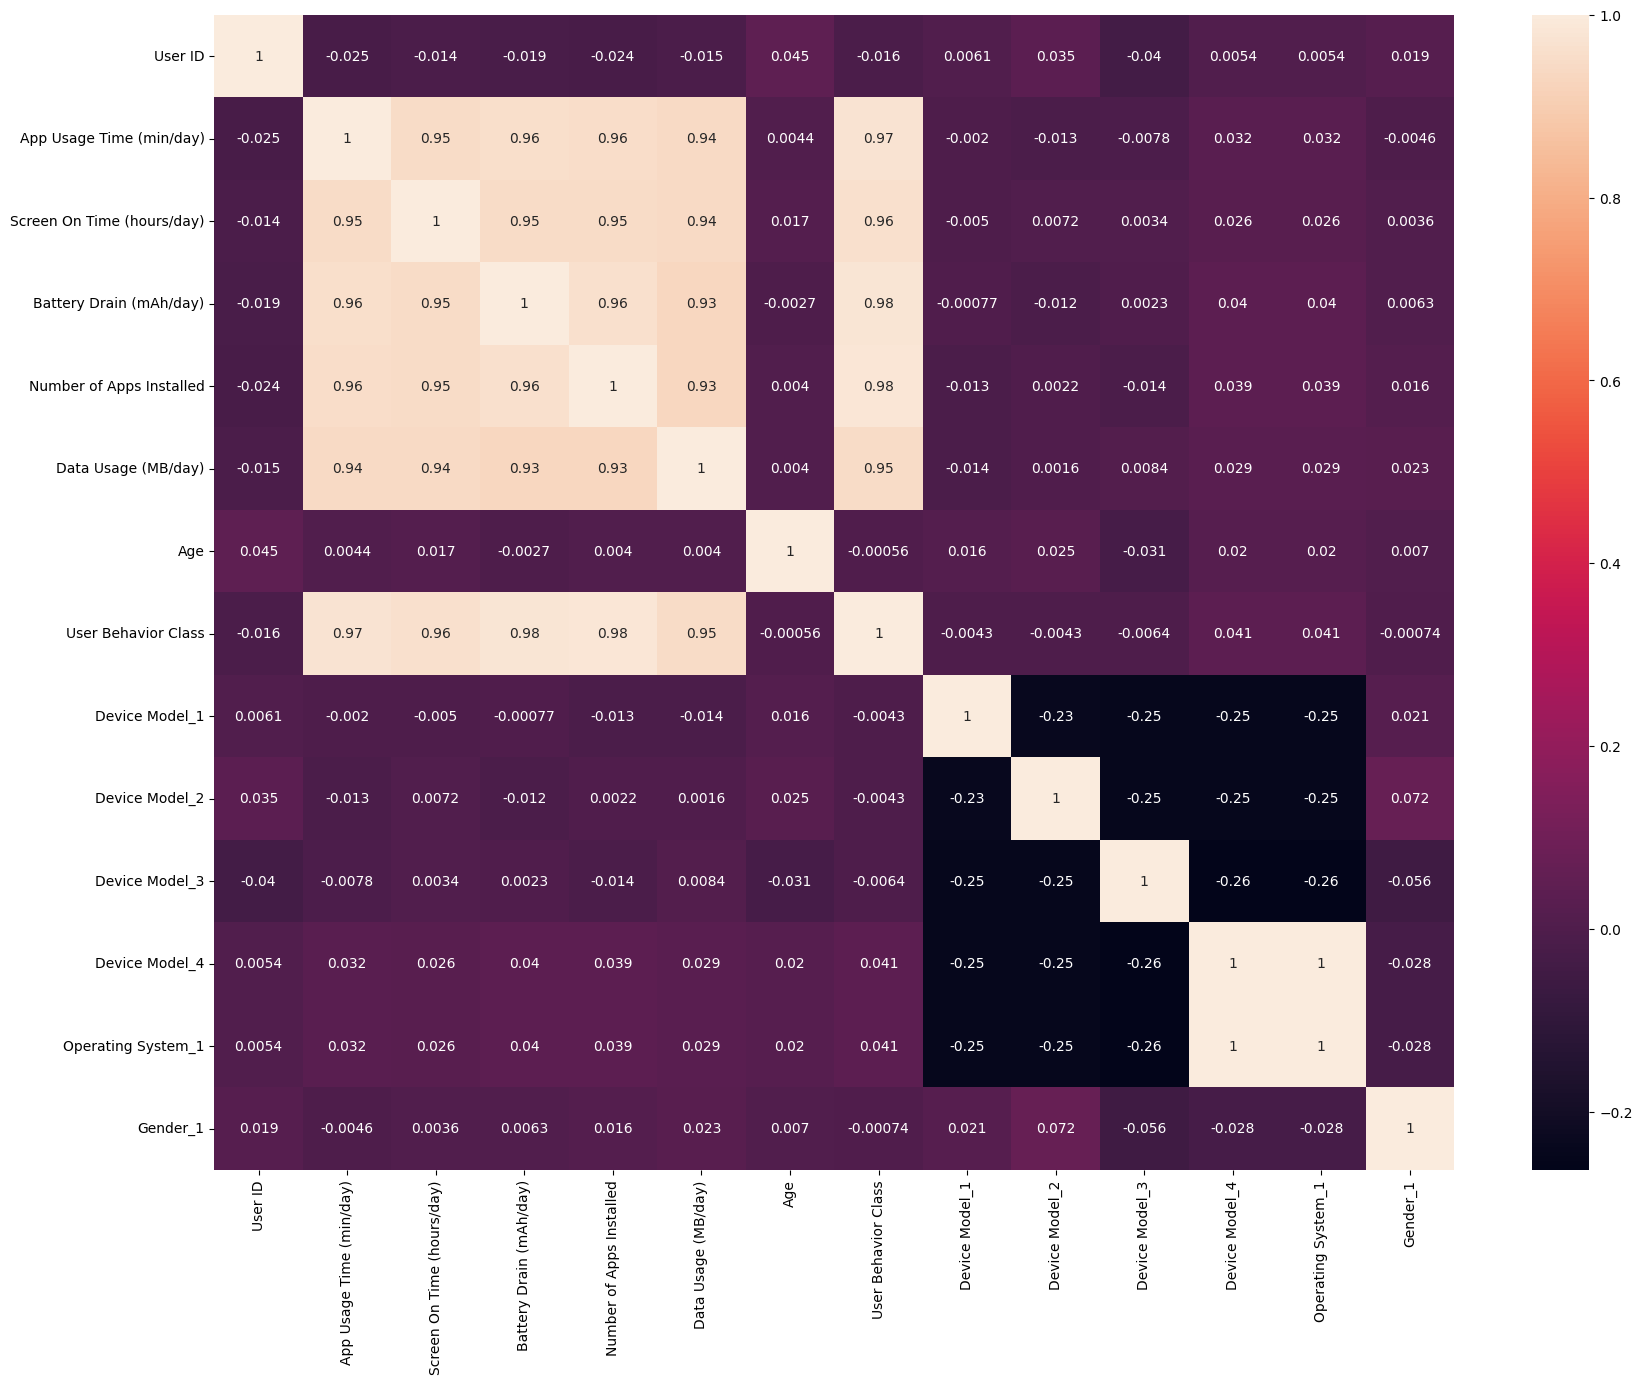

In [13]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)

From the above heatmap, no correlation of Gender,age,operating system,device-model and user id on the user behaviour

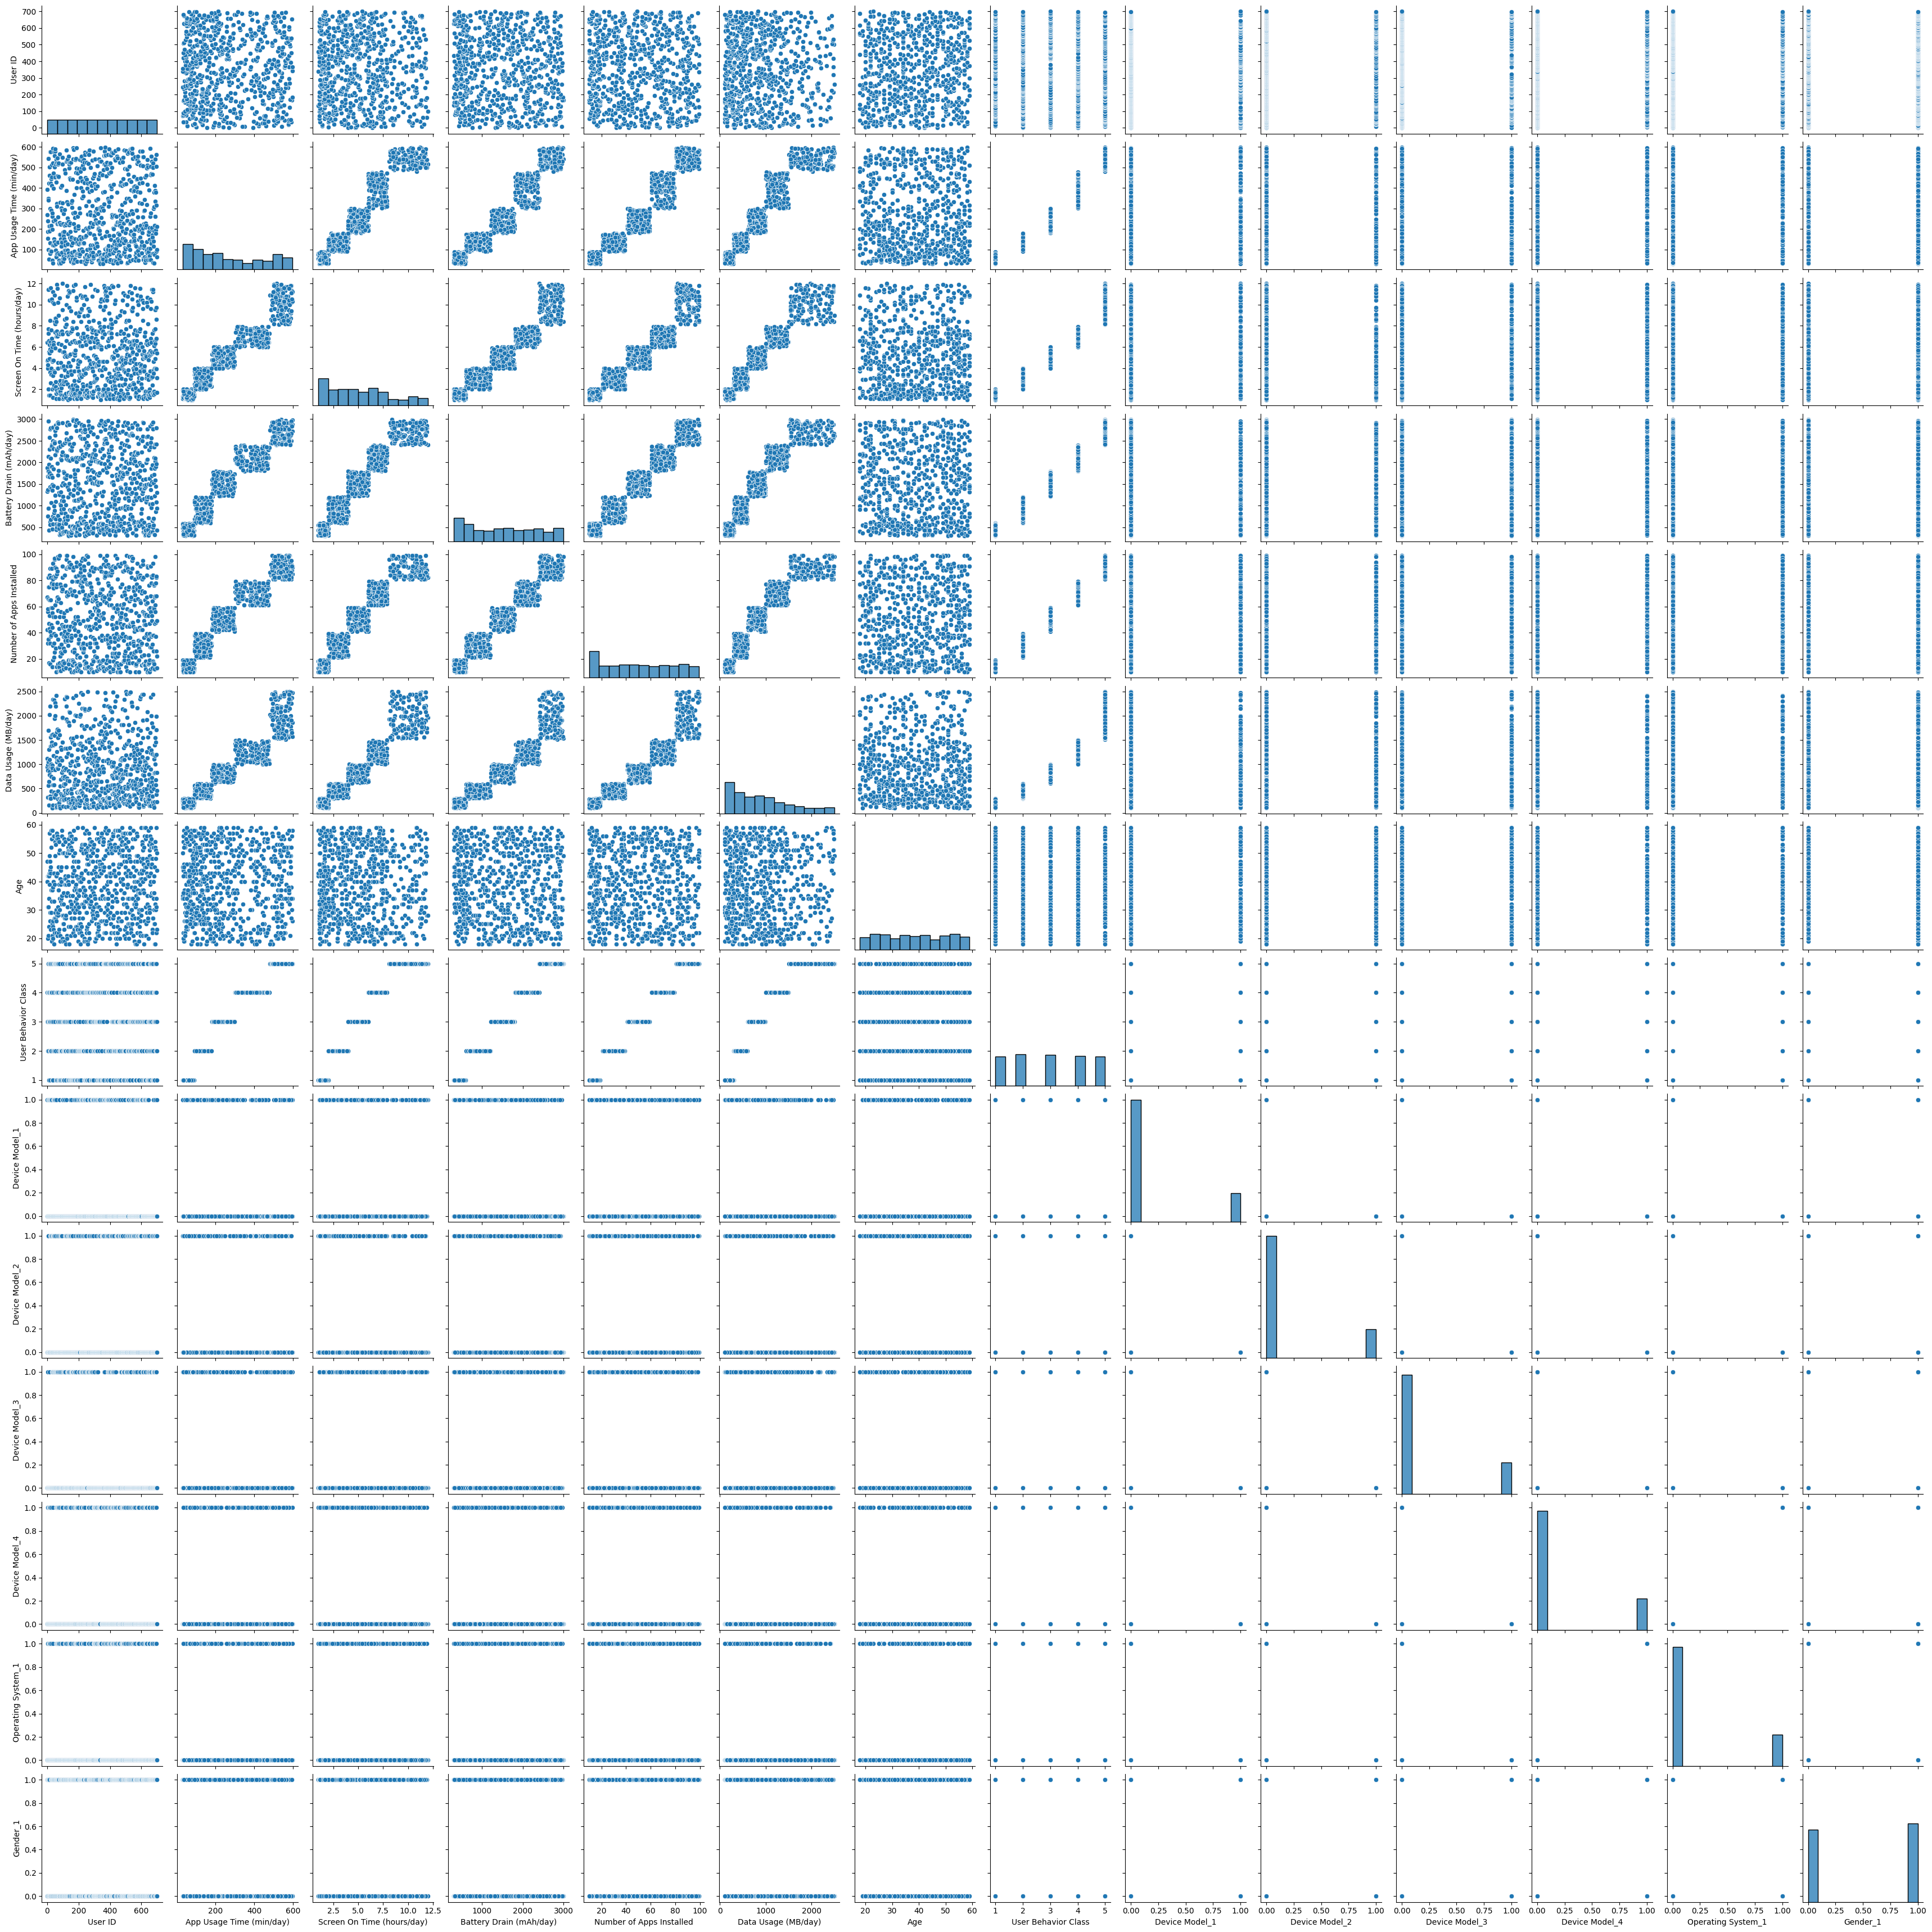

In [16]:
import warnings
warnings.simplefilter('ignore')
sns.pairplot(df)

In [17]:
df1=pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")
df1.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


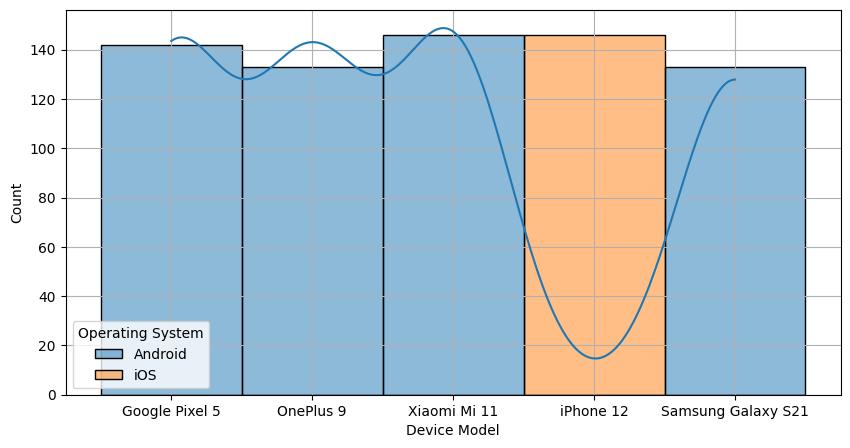

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data=df1, x='Device Model', kde=True, hue='Operating System')
plt.grid()
plt.show()

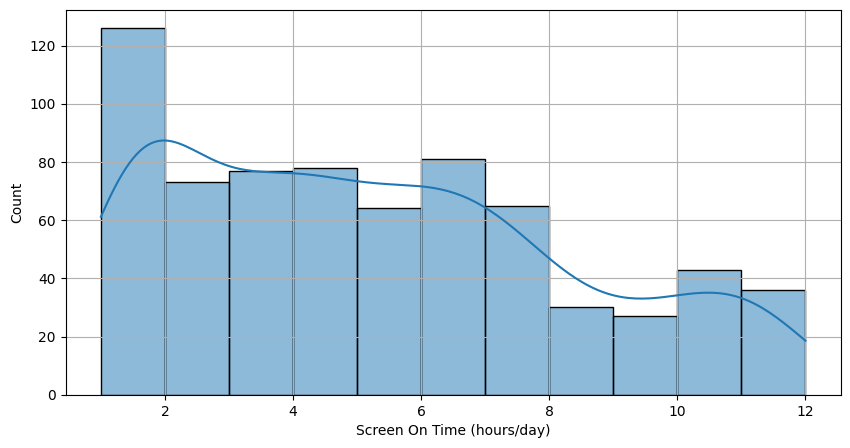

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x='Screen On Time (hours/day)', kde=True)
plt.grid()
plt.show()

In [21]:
X=df.drop(columns=['User Behavior Class'],axis=1)
y=df['User Behavior Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=45)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7
Confusion Matrix:
 [[49  9  0  0  0]
 [ 1 44  8  0  0]
 [ 0 18 33 19  0]
 [ 0  0  9 30 13]
 [ 0  0  0  7 40]]
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.84      0.91        58
           2       0.62      0.83      0.71        53
           3       0.66      0.47      0.55        70
           4       0.54      0.58      0.56        52
           5       0.75      0.85      0.80        47

    accuracy                           0.70       280
   macro avg       0.71      0.71      0.70       280
weighted avg       0.71      0.70      0.70       280



In [30]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[58  0  0  0  0]
 [ 0 53  0  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 47]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        47

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [31]:
from sklearn.svm import SVC

# Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[58  0  0  0  0]
 [ 0 53  0  0  0]
 [ 0  0 70  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 47]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        47

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9964285714285714
Confusion Matrix:
 [[58  0  0  0  0]
 [ 0 53  0  0  0]
 [ 0  1 69  0  0]
 [ 0  0  0 52  0]
 [ 0  0  0  0 47]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        58
           2       0.98      1.00      0.99        53
           3       1.00      0.99      0.99        70
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        47

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

